In [1]:
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov

import matplotlib as plt
import scanpy as sc
import numpy as np
import pandas as pd
import os

/opt/homebrew/Caskroom/miniconda/base/envs/nico_env/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nico_env/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nico_env/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/nico_env/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/

In [ ]:
### in order to run this, you need an adata object containing cell type annotations ###
### you also need to create an output folder (I called mine "new_nico") with a folder inside it called "nico_out" ###

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.1 # set the value globally

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.sans-serif'] = ['Helvetica']

# use the default font for all the figures
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']

import warnings
warnings.filterwarnings("ignore")

## Load and Subset

In [3]:
adata = sc.read_h5ad('/PATH/spatial_object_annotated.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 167132 × 300
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'annotated_lineage', 'level2_celltypes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotated_lineage_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
# get spatial coordinates
coords = adata.obsm['spatial']
x_coords = coords[:, 0]
y_coords = coords[:, 1]

In [ ]:
# focus on a specific area of tissue (if desired)
# if you want to focus on the whole tissue, do not run this code chunk or the one directly following; skip down 

# define the coordinate ranges for your region of interest
x_min = 800.64  # Replace with your values
x_max = 985  # Replace with your values
y_min = 3003  # Replace with your values
y_max = 3216  # Replace with your values

# boolean mask for cells within region
in_region = (x_coords >= x_min) & (x_coords <= x_max) & \
            (y_coords >= y_min) & (y_coords <= y_max)

# subset 
adata_region = adata[in_region].copy()

In [ ]:
# number of cells in original
print("Total cells:", adata.n_obs)

# number of cells in subset
print("Cells in region:", adata_region.n_obs)

# plot 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], s=1, c='lightgray', label='All cells')
plt.scatter(adata_region.obsm['spatial'][:, 0], adata_region.obsm['spatial'][:, 1], s=1, c='red', label='Region cells')
plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Spatial coordinates of the region')
plt.show()

## Set Paths and Parameters

In [6]:
#### run this only if you want to analyze the full tissue and did not run the previous two code chunks ###
adata_region = adata

In [7]:
adata

AnnData object with n_obs × n_vars = 167132 × 300
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'annotated_lineage', 'level2_celltypes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotated_lineage_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
# rename your column name containing annotations to 'nico_ct' (here it's originally called 'level2_celltypes')
adata_region.obs['nico_ct'] = adata_region.obs['level2_celltypes']

In [9]:
# check cell types in the object
adata_region.obs['nico_ct'].unique()

['UNASSIGNED', 'DCT2', 'aPT', 'EC-LYM', 'Immune', ..., 'REN', 'aFIB CD34', 'dPOD', 'MAC-INF', 'aFIBnew']
Length: 96
Categories (96, object): ['ATL', 'B', 'C-FIB-PATH', 'C-MYOF', ..., 'pvFIB-PI16+', 'pvMYOF', 'resMAC', 'tPC-IC']

In [10]:
# define the cell types to exclude (if desired)
medulla_cell_types_to_exclude = ['EC-LYM', 'infEC-AVR', 'infEC-DVR', 'C/M-TAL', 'C/M-FIB', 'DTL1', 'DTL2', 'DTL3', 'aDTL', 'ATL', 'Ad', 'ERY', 'M-TAL', 'dM-TAL', 'cycTAL', 'M-PC', 'dM-PC', 'IMCD', 'dIMCD', 'M-IC-A', 'dM-IC-A', 'EC-PTC', 'EC-AVR', 'EC-DVR', 'dEC-AVR', 'M-FIB', 'dM-FIB', 'PapE']

# exclude the specified cell types (if desired)
adata_region = adata_region[~adata_region.obs["nico_ct"].isin(medulla_cell_types_to_exclude)].copy()

# verify the remaining cell types
remaining_cell_types = adata_region.obs["nico_ct"].unique()
print("Remaining cell types:", remaining_cell_types)

Remaining cell types: ['UNASSIGNED', 'DCT2', 'aPT', 'Immune', 'PT-S3', ..., 'REN', 'aFIB CD34', 'dPOD', 'MAC-INF', 'aFIBnew']
Length: 80
Categories (80, object): ['B', 'C-FIB-PATH', 'C-MYOF', 'C-TAL', ..., 'pvFIB-PI16+', 'pvMYOF', 'resMAC', 'tPC-IC']


In [11]:
# write the adata to your nico_out folder
adata_region.write_h5ad("/PATH/nico_out/xenium.h5ad")

In [12]:
# assign save name
annotation_save_fname = 'xenium.h5ad'

In [13]:
# load the saved AnnData object
adata_loaded = sc.read_h5ad(annotation_save_fname)

# verify that 'nico_ct' is in adata_loaded.obs
print(adata_loaded.obs.columns)

Index(['cell_id', 'x_centroid', 'y_centroid', 'transcript_counts',
       'control_probe_counts', 'control_codeword_counts',
       'unassigned_codeword_counts', 'deprecated_codeword_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts',
       'leiden', 'annotated_lineage', 'level2_celltypes', 'nico_ct'],
      dtype='object')


## Niche Cell Type Interactions

In [15]:
# set output directories
output_nico_dir = '/PATH/new_nico/nico_out/'
output_annotation_dir = '/PATH/new_nico/'

# radius parameter for neighborhood analysis (0 for immediate neighbors)
inputRadius = 50

# parameters for saving plots
saveas = 'png'
transparent_mode = False

In [16]:
# run the NiCo spatial analysis
niche_pred_output = sint.spatial_neighborhood_analysis(
    Radius=inputRadius,
    output_nico_dir=output_nico_dir,
    anndata_object_name=annotation_save_fname,
    spatial_cluster_tag='nico_ct', 
    seed=42
)

average neighbors: 47.19499897239159
average distance: 32.93540717312512
data shape (145935, 82) (145935,) neighbor shape (145935, 79)
Searching hyperparameters  Grid method: 0.0009765625
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.0009765625
Inverse of lambda regularization found 0.0009765625
training (116748, 79) testing (29187, 79) coeff (79, 79)


In [26]:
# this cutoff is used for the visualization of cell type interaction networks
celltype_niche_interaction_cutoff=0.1

The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/Niche_interactions_without_edge_weights_R50.png


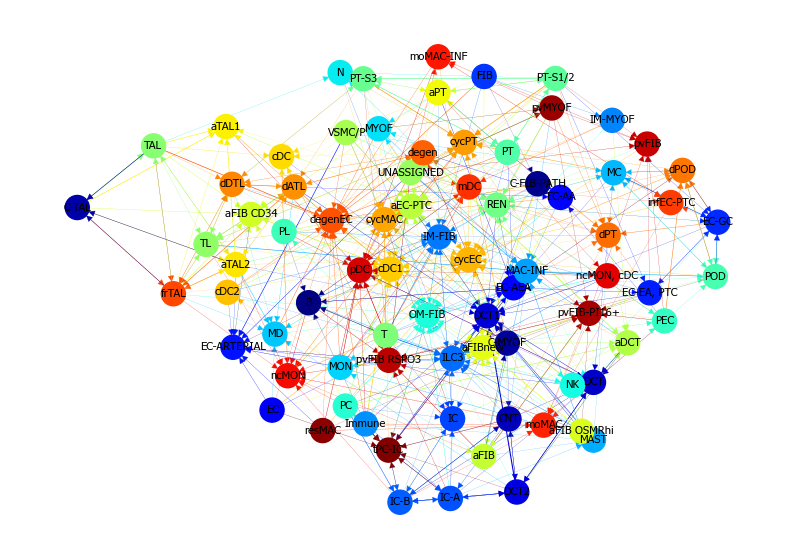

In [27]:
# plot the niche interaction network without any edge weight details for cutoff

import pygraphviz

sint.plot_niche_interactions_without_edge_weight(
    niche_pred_output,
    niche_cutoff=celltype_niche_interaction_cutoff,
    saveas=saveas,
    transparent_mode=transparent_mode
)

The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/Niche_interactions_with_edge_weights_R50.png


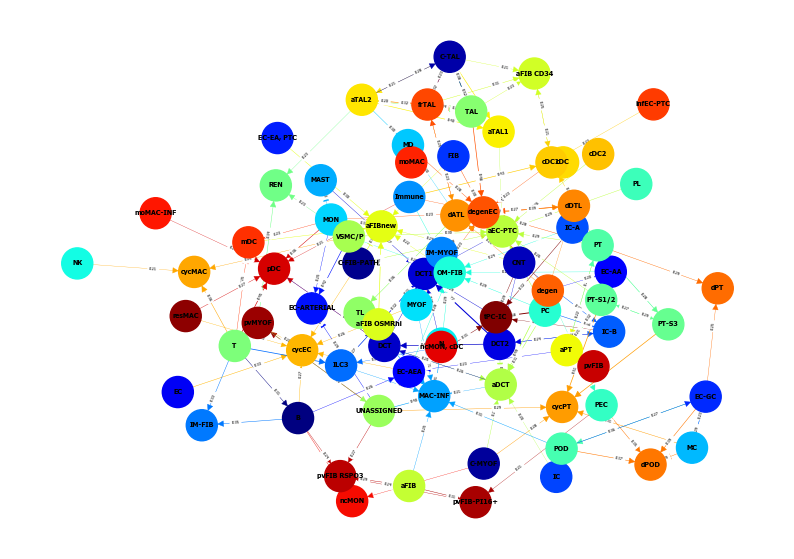

In [19]:
# plot the niche interaction network with edge weight details for cutoff

sint.plot_niche_interactions_with_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,transparent_mode=transparent_mode)

The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/TopCoeff_R50/Rank17_POD.png
The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/TopCoeff_R50/Rank20_frTAL.png


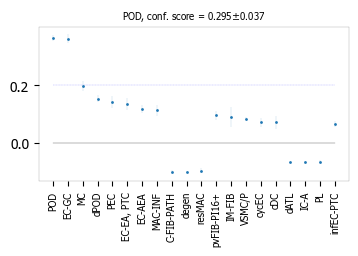

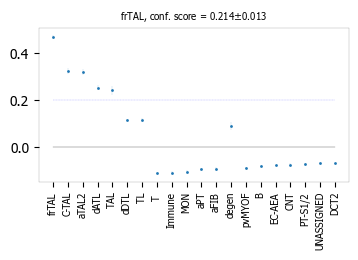

In [20]:
# plot regression coefficients of niche cell types for given central cell types, ordered by magnitude
# regression coefficients reflecting local niche interaction
# sparsity of this graph can be controlled by a cutoff on the regression coefficients
# blue dotted line in the plot indicates celltype_niche_interaction_cutoff

sint.find_interacting_cell_types(niche_pred_output,
choose_celltypes=['frTAL','POD'],
celltype_niche_interaction_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,transparent_mode=transparent_mode,figsize=(4.0,2.0))

In [21]:
# plot the ROC curve of the classifier prediction for one of the crossfolds
#sint.plot_roc_results(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode)
#sint.plot_predicted_probabilities(niche_pred_output)

The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/Confusing_matrix_R50.png


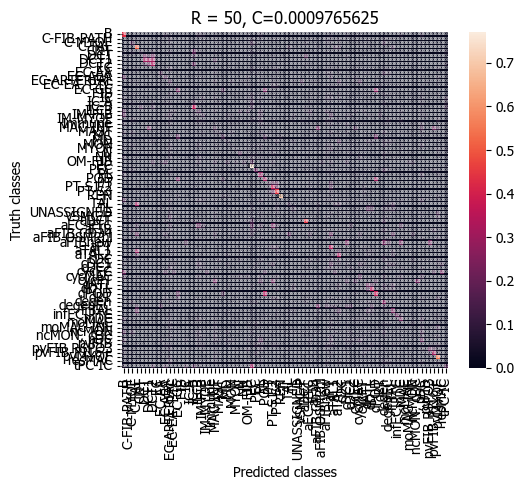

In [22]:
# plot average confusion matrix of the classifier from cross-folds
sint.plot_confusion_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode)

The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/weight_matrix_R50.png


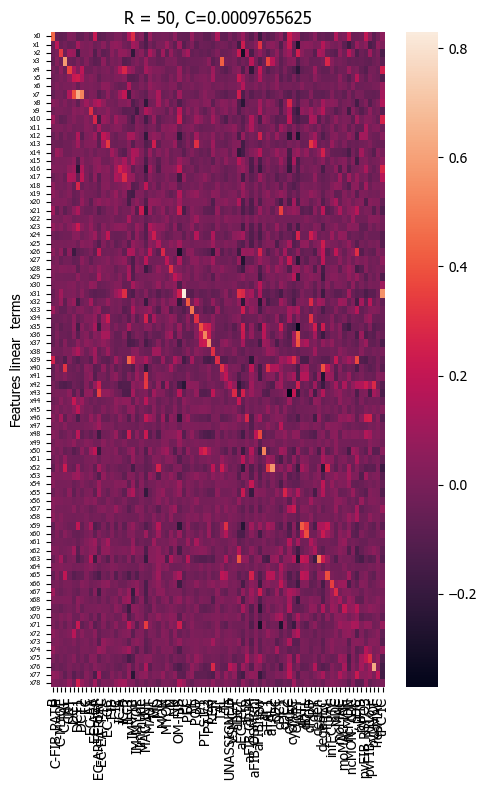

In [23]:
# plot the average coefficient matrix of the classifier from cross-folds
sint.plot_coefficient_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode)

The figures are saved:  /Users/stephreinert/Desktop/new_nico/nico_out/niche_prediction_linear/scores_50.png


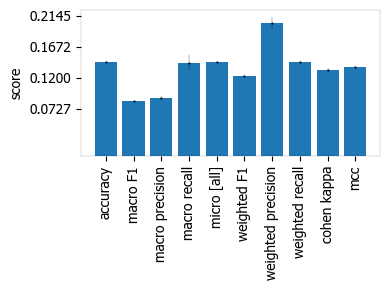

In [24]:
# plot the evaluation score of the classifier for different metrics
sint.plot_evaluation_scores(niche_pred_output,
saveas=saveas, transparent_mode=transparent_mode,
figsize=(4,3))